## 데이터 준비
### MNIST 숫자 손글씨 Dataset 불러오기

텐서플로우(TensorFlow)의 표준 API인 `tf.kreas`의 Sequential API를 이용해 숫자 손글씨 만들어보자.

>구글에서 오픈소스로 제공하는 텐서플로우는 가장 널리 사용되는 머신러닝 라이브러리 중 하나이다. (여기서는 Tensorflow 2.4.1을 사용한다)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__) # tensorflow 버전 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동 진행.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train)) # x_train 배열의 크기를 출력

2.7.0
11501568/11490434 [==============================] - 0s 0us/step
60000


위 코드를 실행하면 숫자 손글씨 데이터베이스인 MNIST 데이터셋을 읽을 수 있다.
- MNIST 데이터셋은 Yann Lecun 교수님이 공개한 데이터이다. [참고문헌](http://yann.lecun.com/exdb/mnist/)
- 28x28 사이즈의 숫자 손글씨 이미지로, 250여명의 손글씨가 포함된 60000장의 training set와 10000장의 test set로 구성된다.

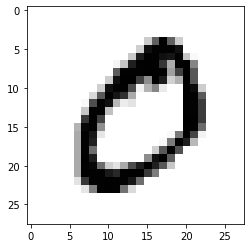

In [2]:
# 불러들인 숫자 손글씨 이미지 하나 출력
# MNIST 데이터셋의 X 항목(x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [3]:
# y_train 행렬의 2번째 값을 확인해보면  X 항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨있음을 알 수 있다.
print(y_train[1])

0


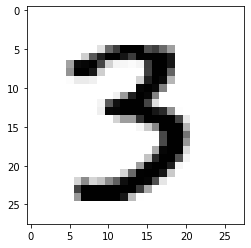

10001 번째 이미지 숫자는 바로  3 입니다.


In [4]:
# index에 0~59999 사이 숫자를 지정해보자.
index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index + 1), '번째 이미지 숫자는 바로 ', y_train[index], '입니다.')

참고 : Matplotlib이란?

> 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능들을 제공한다.


### 학습용 데이터와 시험용 데이터
`(x_train, y_train), (x_test, y_test) = mnist.load_data()`

위 코드를 살펴보면 `mnist.load()` 함수를 통해 학습용 데이터 `(x_train, y_train)` 와 시험용 데이터 `(x_test, y_test)` 를 나누어서 받아들이는 것을 볼 수 있다.

우리가 만들 숫자 손글씨 분류기는 학습용 데이터만을 가지고 학습한 후, 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인하기 위해 시험용 데이터로 테스트를 할 수 있다.

> MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 갖고 있다. <br> 그 중 250여명의 데이터가 학습용 데이터로, 나머지가 데이터 시험용 데이터로 이용된다.

In [5]:
# 불러들인 학습용 데이터가 몇 장인지 확인
print(x_train.shape)  # 28x28 크기의 숫자 이미지가 60000장

# 불러들인 시험용 데이터가 몇 장인지 확인
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- [학습용 데이터, 검증용 데이터, 시험용 데이터의 의미와 차이점](https://ganghee-lee.tistory.com/38)


### 데이터 전처리
숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가진다.

In [6]:
print('최소값 : ',  np.min(x_train), ' 최대값 : ', np.max(x_train))

최소값 :  0  최대값 :  255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0\~1 사이의 값으로 정규화하는 것이 좋다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나눠주면 된다. 

In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값 : ', np.min(x_train_norm), ' 최대값 : ', np.max(x_train_norm))

최소값 :  0.0  최대값 :  1.0


## 딥러닝 네트워크 설계
### Sequential Model을 사용해보자.
데이터가 모두 준비되었다면 이제 딥러닝 네트워크를 만들어야 한다.  
여기서는 텐서플로우 케라스 `tf.keras` 에서 Sequential API라는 방법을 사용한다. Sequential API는 개발의 자유도는 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수있는 방법이다. 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있다.  

다음의 코드는 `tf.keras` 의 Sequential API를 이용해 LeNet이라는 딥러닝 네트워크를 설계한 예다. 

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수다. 여기서는 16과 32를 사용했다. 가장 먼저 16개 이미지 특징을, 그 뒤에 32개 이미지 특징을 고려하겠다는 뜻이다. 우리의 숫자 이미지는 매우 단순한 형태의 이미지인 반면 강아지 얼굴 사진이 입력 이미지라면 훨신 디테일하고 복잡한 영상이기 때문에 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있다. 
- Dense 레이어의 첫 번재 인자는 분류기에 사용되는 뉴런의 숫자다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다. 가령 10개의 숫자가 아닌 알파벳을 구분하고 싶다면 총 52개의 클래스를 분류해야하므로 32보다 큰 64나 128을 고려해 볼 수 있다.
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스의 수로 지정하면 된다. 숫자 인식기에서는 10, 알파벳 인식기에선느 52가 될 것이다. 

우리가 만든 딥러닝 네트워크 모델을 확인해보려면, `model.summary()` 메소드를 이용하면 된다.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

## 딥러닝 네트워크 학습시키기

우리가 만든 네트워크의 입력은 `(데이터 개수, 이미지 크기 x, 이미지 크기 y, 채널 수)` 와 같은 형태를 가진다.  
그런데 `print(x_train.shape)` 을 해보면, `(60000, 28, 28)` 로 채널 수에 대한 정보가 없다. 따라서 `(60000, 28, 28, 1)` 로 만들어 주어야 한다. (여기서 채널 수 1은 흑백 이미지를 의미한다. 컬러 이미지의 경우 RGB 값이 있기 때문에 3이 된다.)

In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터 개수에 -1을 쓰면 reshape시 자동으로 계산된다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


이제 `x_rain` 학습 데이터로 딥러닝 네트워크를 학습시켜 보자.  
여기서 `epochs=10` 은 전체 60000개의 데이터를 10번 반복 사용해 학습을 시키라는 뜻이다. 

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1905 - accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0604 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0168 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 31s 16m

각 학습이 진행됨에 따라 epoch 별로 `accuracy` 가 올라가는지 확인할 수 있다.  
9 epoch 정도부터는 `accuracy`의 상승이 미미하기 때문에 10 epoch 정도 학습을 시키면 충분하다.

<br>

## 잘 만들었는지 확인하기
### 테스트 데이터로 성능 확인
위의 `accuracy` 는 학습용 데이터(`x_train`)을 가지고 구한 것이다.  
이제 시험용 데이터(`x_test`)를 가지고 확인해보자.

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss : {} ".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

313/313 - 2s - loss: 0.0410 - accuracy: 0.9893 - 2s/epoch - 6ms/step
test_loss : 0.04100910201668739 
test_accuracy : 0.989300012588501


`model.evaluate()` 대신 `model.predict()` 를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다.

In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0 # 1번째 x_test
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.4269425e-14 1.4076893e-11 7.4680697e-09 9.6518821e-11 1.8178413e-13
 5.8276354e-15 5.8526093e-15 1.0000000e+00 3.4841189e-14 2.1012212e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


이 경우에 model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 된다.
정말 숫자 7인지 확인해보자.

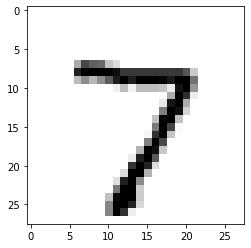

In [14]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해 볼 수도 있다.

예측확률분포 :  [3.36287975e-09 5.62022038e-08 1.13590055e-07 2.37050062e-06
 1.74766847e-05 3.95360811e-09 4.89737528e-10 7.98926249e-06
 3.17384620e-05 9.99940276e-01]
라벨 : 8, 예측결과9


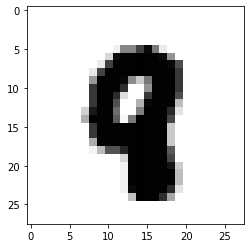

예측확률분포 :  [7.9971401e-04 4.5413235e-03 1.0995979e-02 2.8258560e-03 3.7900329e-04
 8.7301791e-01 3.4177718e-03 1.8421158e-03 1.0204185e-01 1.3862088e-04]
라벨 : 8, 예측결과5


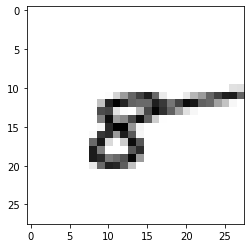

예측확률분포 :  [1.5438222e-09 6.6646549e-05 1.1996326e-07 2.2247787e-06 8.6739004e-01
 2.7753222e-06 3.7171627e-05 5.4526259e-07 1.3210109e-01 3.9934446e-04]
라벨 : 8, 예측결과4


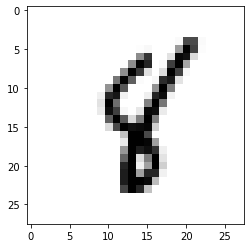

예측확률분포 :  [4.6857900e-04 3.6304671e-02 3.2896353e-03 9.1215196e-07 3.6255455e-01
 2.0090837e-07 2.8708430e-07 5.9728044e-01 8.8980090e-07 9.9790210e-05]
라벨 : 4, 예측결과7


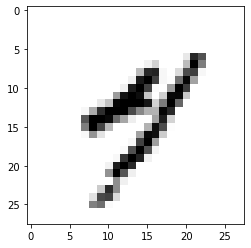

예측확률분포 :  [4.6857900e-04 3.6304671e-02 3.2896353e-03 9.1215196e-07 3.6255455e-01
 2.0090837e-07 2.8708430e-07 5.9728044e-01 8.8980090e-07 9.9790210e-05]
라벨 : 4, 예측결과7


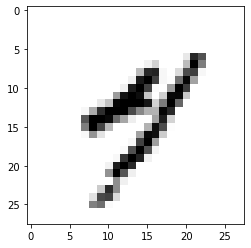

In [15]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
  # i번째 test_labels와 y_test가 다른 경우만 모은다
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# wrong_predict_list에서 랜덤하게 5개만 뽑는다
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
  print("예측확률분포 : ", str(predicted_result[n]))
  print("라벨 : " + str(y_test[n]) + ", 예측결과" + str(predicted_labels[n]))
  plt.imshow(x_test[n], cmap=plt.cm.binary)
  plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 혼란스러워한다는 것을 알 수 있다.  
model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나다.


### 더 좋은 네트워크 만들어보기
그렇다면 인식률을 99점대로 만들어 볼 수 없을까?  
딥러닝 네트워크의 구조 자체는 바꾸지 않더라도 하이퍼파라미터들을 바꿔 볼 수 있다.  
`Conv2D` 레이어에서 입력 이미지의 특징 수를 늘리거나 줄이거나, `Dense` 레이어에서 뉴런 수를 바꿔 보거나, 학습 반복 횟수인 `epoch` 값을 변경해 볼 수 있다.

In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               